### A Study of the Relations of the Brain to to the Size of the Head

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns GENDER: Gender Male or Female AGE: Age Range 20-46 or 46+ SIZE: Head size (cm^3) 21-24 WEIGHT: Brain weight (grams) 29-32

In [11]:
import pandas as pd

brain_headsize = pd.read_csv('../resources/brain_headsize.csv')
brain_headsize.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [12]:
X = brain_headsize.drop('weight', axis=1)
y = brain_headsize['weight'].values.reshape(-1,1)

print(X.shape, y.shape)

(237, 3) (237, 1)


### Dummy Encoding 
Converting strings, `gender` into numerical data. Using the `get_dummies` (Pandas provides a shortcut to create Binary Encoded Data) method to generate binary encoded data from the `brain_headsize` dataframe.

Dummy encoding transforms each categorical feature into new columns with a 1(True) or 0(False) encoding to represent if that categorical label was present or not in the original row.

In [15]:
data_binary_encoded = pd.get_dummies(brain_headsize)
data_binary_encoded.head()

,size,weight,gender_Female,gender_Male,age_20-46,age_46+
0,4512,1530,0,1,1,0
1,3738,1297,0,1,1,0
2,4261,1335,0,1,1,0
3,3777,1282,0,1,1,0
4,4177,1590,0,1,1,0


In [16]:
X = data_binary_encoded.drop('weight', axis=1)
y = data_binary_encoded['weight'].values.reshape(-1,1)

print(X.shape, y.shape)

(237, 5) (237, 1)


### Scaling and Normalization

Scaling and normalization is used on the data so that linear_model algorithm will perform better. This is especially useful on models that use gradient descent; it'll help it converge to a local optima. 

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the differences in the following plots.

In [17]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

xscaler = StandardScaler().fit(xtrain)
yscaler = StandardScaler().fit(ytrain)

xtrain_scaled = xscaler.transform(xtrain)
ytrain_scaled = yscaler.transform(ytrain)

xtest_scaled = xscaler.transform(xtest)
ytest_scaled = yscaler.transform(ytest)

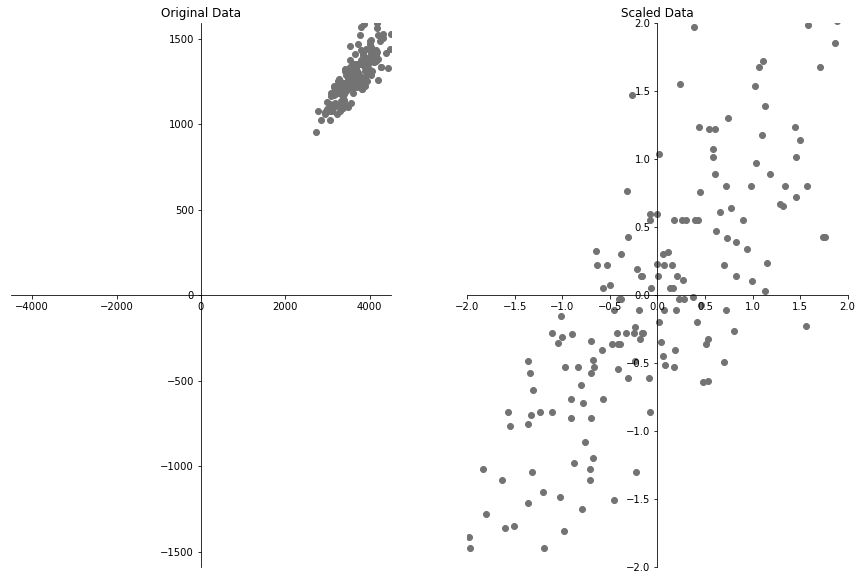

In [19]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15, 10))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = xtrain["size"].max()
maxy = ytrain.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(xtrain["size"], ytrain, c = '0.45')
axes2.scatter(xtrain_scaled[:,0], ytrain_scaled[:], c = '0.45')

### Residual

- Using a residual plot to check our predictions because we can't easily plot our line in 3D space. Residuals are the errors between the predicted and the actual values of y; we want it to show no pattern.

Text(0.5, 1.0, 'Residual Plot')

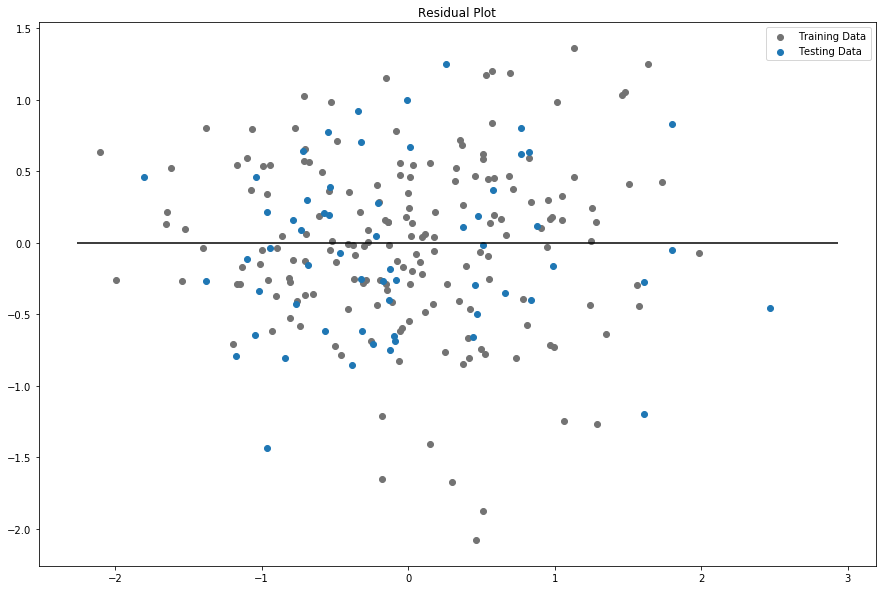

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(model.predict(xtrain_scaled), model.predict(xtrain_scaled)-ytrain_scaled, label='Training Data', c='0.45')
plt.scatter(model.predict(xtest_scaled), model.predict(xtest_scaled)-ytest_scaled, label='Testing Data')
plt.legend()
plt.hlines(y=0, xmin=ytest_scaled.min(),xmax=ytest_scaled.max())
plt.title('Residual Plot')

### Quantifying the Model
We want to find is a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called `ordinary least squares` or a computational appraoch `gradient descent` for estimating the parameters. Note that there are tradeoffs between using either approach. The Linear Regression model in Sklearn uses the `ordinary least squares` method.

 
There are a variety of ways to quantify the model, but MSE and R2 are very common

- MSE does not have an uppur bound.
- R2 is between 0 and 1.
- A 'good' MSE score will be close to zero while a 'good' R2 Score will be close to 1.

Fitting the scaled-training data into a `LinearRegression Model` and making predictions, then quantifying it with the `MSE` and `R2 Score`.



In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(xtrain_scaled, ytrain_scaled)

print('weight ceoffiecients:', model.coef_)
print('y-axis intercept:', model.intercept_)

weight ceoffiecients: [[ 0.74104434 -0.03952285  0.03952285  0.05029977 -0.05029977]]
y-axis intercept: [-9.21494404e-16]


Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:
y = bias + weight1*feature1 + weight2*feature2

Acceptable Mean-Squared-Error and R-Squared validating the LinearRegression model. 

In [59]:
scaled_predictions = model.predict(xtest_scaled)
predictions = model.predict(xtest)


scaled_mse = mean_squared_error(ytest_scaled, scaled_predictions)
scaled_r2 = model.score(xtest_scaled, ytest_scaled)

mse = mean_squared_error(ytest, predictions)
r2 = model.score(xtest, ytest)

pd.DataFrame({'Mean-Squared-Error': [f'{scaled_mse:.4}',
                                     f'{mse:.4}'], 
              
              'R-Squared': [f'{scaled_r2:.4}',
                            f'{r2:.4}']     
                            }, index = ['StandardScaler',
                                        'Unprocessed'])

,Mean-Squared-Error,R-Squared
StandardScaler,0.3231,0.6805
Unprocessed,1.983e+06,-135.4


_____

## Logistic Regression

A classification algorithm used to predict a discrete set of classes or categories; a statistical method for predicting binary outcomes from data.

Unlike linear regression which outputs continuous number values (for example, age), logistic regressionnn applies an activation function, such as the sigmoid function, to return a probability value of 0 or 1. This can be mapped to a discrete class like 'male' or 'female'

- a statistical method to predict a descrete output or category
- the most basic neural network you can create

Calculate the `logistic regression` by adding an `activation function` as a final step to our `linear model`. This converts the linear regression output to a probability.

In [30]:
import pandas as pd

brain_headsize = pd.read_csv('../resources/brain_headsize.csv')
brain_headsize.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [31]:
data = brain_headsize.drop('gender', axis=1)
gender = brain_headsize['gender']

print(data.shape, gender.shape)

(237, 3) (237,)


### Label Encoding (Binary Endcoded Data)


Encodes each category as an integer value. Sklearn provides a preprocessing library to assist with this. 

- beware that some models are sensitive to Integer Encoding!
- distance equations in clusturing algorithms are particularly sensitive


In [32]:
from sklearn.preprocessing import LabelEncoder

data = data.copy()

label_encoder = LabelEncoder().fit(data['age'])
label_encoder.classes_

array(['20-46', '46+'], dtype=object)

In [33]:
age = pd.DataFrame(label_encoder.transform(data.age), columns = ['age_encode'])

data = pd.concat([age, data], axis = 1)
data = data.drop('age', axis=1)
data.head(2)

,age_encode,size,weight
0,0,4512,1530
1,0,3738,1297


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(data,gender,random_state=1,stratify=gender)

In [25]:
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
classifier.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### validate the LinearRegression model using the test data; calulate accuracy

In [41]:
print(f'training-accuracy score: {classifier.score(xtrain,ytrain)}')
print(f'testing-accuracy score: {classifier.score(xtest,ytest)}')

training-accuracy score: 0.7005649717514124
testing-accuracy score: 0.6833333333333333


In [67]:
predictions = classifier.predict(xtest)
pd.DataFrame({'prediction': predictions, 'actual': ytest}).head(25)

,prediction,actual
147,Female,Female
30,Male,Male
65,Male,Male
92,Male,Male
162,Female,Female
145,Male,Female
130,Male,Male
121,Male,Male
152,Male,Female
105,Male,Male


___

### Decision Trees & Random Forests

More powerful than a Decision Tree is a Random Forest. Instead of a single complex tree, a random forest algorithm will sample the data and build many smaller, simpler decision trees. Each tree built from a subset of the data.

Each simple tree from a Random Forest is considered a 'weak classifier', but when you combine them, they form a 'strong classifier'.

In [43]:
#Decision Tree

from sklearn import tree
decision_tree_clf = tree.DecisionTreeClassifier().fit(xtrain,ytrain)

In [48]:
import graphviz

dot_data = tree.export_graphviz(decision_tree_clf,
                                filled = True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

True

In [50]:
decision_tree_clf.score(xtest,ytest)

0.6

In [90]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=250).fit(xtrain,ytrain)

In [91]:
random_forest_clf.score(xtest,ytest)

0.65

In [92]:
predictions = random_forest_clf.predict(xtest)
pd.DataFrame({'prediction': predictions, 'actual': ytest}).head(25)

,prediction,actual
147,Female,Female
30,Male,Male
65,Female,Male
92,Male,Male
162,Male,Female
145,Male,Female
130,Male,Male
121,Male,Male
152,Male,Female
105,Male,Male


___

### K Nearest Neighbors

Another means to classify data, KNN is a simple and robust algorithm for classification(and sometimes regression). It has many benefits such as outlier insensitivity, ability to classify non-linear data, and a high accuracy

It does require alot of memory. 

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
train_scores = []
test_scores = []

for K in range(1,80,2):
    knn_classifier = KNeighborsClassifier(n_neighbors=K).fit(xtrain,ytrain)
    
    train_score = knn_classifier.score(xtrain, ytrain)
    test_score = knn_classifier.score(xtest, ytest)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
#     print(f'Train/Test Score: {train_score:.3f}/{test_score:.3f} K:{K}')

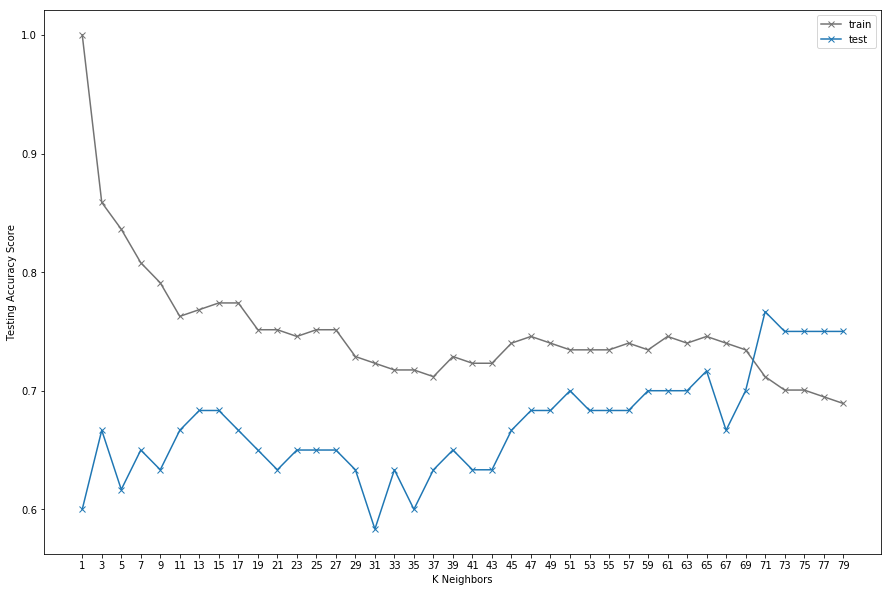

In [122]:
plt.figure(figsize=(15, 10))

plt.plot(range(1,80,2), train_scores, marker='x', c='0.45', label='train')
plt.plot(range(1,80,2), test_scores, marker='x', label='test')
plt.xticks(range(1,80,2))

plt.xlabel('K Neighbors')
plt.ylabel('Testing Accuracy Score')
plt.legend()

In [117]:
knn_classifier = KNeighborsClassifier(n_neighbors=75)
knn_classifier.fit(xtrain,ytrain)

print('K=75 Test Acc: %.3f' %knn_classifier.score(xtest,ytest))

K=75 Test Acc: 0.750
